In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
!pip install git+https://github.com/indra-ipd/scipy.git

  Cloning https://github.com/indra-ipd/scipy.git to /tmp/pip-req-build-5mqr76fc
  Running command git clone -q https://github.com/indra-ipd/scipy.git /tmp/pip-req-build-5mqr76fc
  Running command git submodule update --init --recursive -q
  From https://github.com/scipy/boost-headers-only
   * branch            2110ce20e59917b85b12059b3ddd8b133549f662 -> FETCH_HEAD
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scipy: filename=scipy-1.7.0.dev0+1032.253cdda-cp37-cp37m-linux_x86_64.whl size=56685868 sha256=360df4b0a968fa1ba879c88b3014b8d2c45109c447406b90620020d9d99a57a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-6oz40p0r/wheels/3d/e4/26/f8c192c4555c2f4643b23b020176fb3638f7fd22c1069269d6
Successfully built scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency res

In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
logging.disable(sys.maxsize)

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import collections
import time

# Import MNIST data (http://yann.lecun.com/exdb/mnist/)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
Xtrain, Ytrain, Xtest, Ytest = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
seed = 100
print(seed)
tf.set_random_seed(seed)
image_size = 28
chan_num = 1
labels_size = 10
learning_rate = 0.01
batch_size = 128
batches = int(len(Ytrain) / batch_size)
epoch = 10
iterations = batches


100


In [5]:
training_data = tf.placeholder('float', [None, image_size * image_size * chan_num])
labels = tf.placeholder('float')


algo = ['oLMoQ','oLNAQ','oLBFGS','Adam']
col = {'oLNAQ': 'b', 'oLMoQ': 'm', 'oLBFGS': 'g', 'Adam': 'r'}


In [6]:
def get_batches(x_tr, y_tr, size):
    num_batch = int(len(y_tr) / size)
    data = []
    lab = []
    for i in range(num_batch):
        data.append(x_tr[i * size:i * size + size])
        lab.append(y_tr[i * size:i * size + size])
    return data, lab

Xtr, Ytr = get_batches(Xtrain, Ytrain, batch_size)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def maxpool2d(x):
    #                        size of window         movement of window
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


def convolutional_neural_network(x):
    # [filter_height, filter_width, in_channels, out_channels]
    weights = {'W_conv1': tf.Variable(tf.random_normal([5, 5, 1, 3])),
               'W_conv2': tf.Variable(tf.random_normal([5, 5, 3, 5])),
               'W_fc1': tf.Variable(tf.random_normal([7 * 7 * 5, 100])),
               # 'W_fc2': tf.Variable(tf.random_normal([32, 16])),
               'out': tf.Variable(tf.random_normal([100, labels_size]))}

    biases = {'b_conv1': tf.Variable(tf.random_normal([3])),
              'b_conv2': tf.Variable(tf.random_normal([5])),
              'b_fc1': tf.Variable(tf.random_normal([100])),
              # 'b_fc2': tf.Variable(tf.random_normal([16])),
              'out': tf.Variable(tf.random_normal([labels_size]))}

    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    conv1 = tf.nn.sigmoid(conv2d(x, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool2d(conv1)

    conv2 = tf.nn.sigmoid(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool2d(conv2)

    fc = tf.reshape(conv2, [-1, 7 * 7 * 5])
    fc = tf.nn.sigmoid(tf.matmul(fc, weights['W_fc1']) + biases['b_fc1'])
    # fc = tf.nn.sigmoid(tf.matmul(fc1, weights['W_fc2']) + biases['b_fc2'])
    # fc = tf.nn.dropout(fc, keep_rate)

    output = tf.matmul(fc, weights['out']) + biases['out']

    return output



In [ ]:
config = tf.ConfigProto(allow_soft_placement=True, log_device_placement=False)
config.gpu_options.allow_growth = True

output = convolutional_neural_network(training_data)
# loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(output), reduction_indices=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=output))

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

perm_idx = []
for num in range(epoch):
    perm_idx.append(np.random.permutation(len(Ytrain)))


def get_batches(x_tr, y_tr, size, ep_num):
    # shuffle data
    # idx = np.random.permutation(len(y_tr))
    idx = perm_idx[ep_num - 1]
    x_tr, y_tr = x_tr[idx], y_tr[idx]

    num_batch = int(len(y_tr) / size)
    data = []
    lab = []
    for i in range(num_batch):
        data.append(x_tr[i * size:i * size + size])
        lab.append(y_tr[i * size:i * size + size])
    return data, lab


def update(l, a):
    global train_loss, train_acc
    train_loss = l
    train_acc = a


count = 0
for meth in algo:
    color = col[meth]
    if meth == 'Adam':
        train_step = tf.train.AdamOptimizer(0.0001).minimize(loss)
        epoch = 25
        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

    else:
        m = 4
        # mu = 0.8
        sk_vec = collections.deque(maxlen=m)
        yk_vec = collections.deque(maxlen=m)
        alpha_k = collections.deque(maxlen=1)
        mu_val = collections.deque(maxlen=1)
        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

        alpha_k.append(1)
        vk_vec = collections.deque(maxlen=1)
        vk_vec.append(0)
        dirNorm = True

        if meth == 'oLNAQ' or meth == 'oLBFGS':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         'timeplot':timePlt,'err':errPlt,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})

        elif meth == 'oLMoQ':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,
            #grad_curr = collections.deque(maxlen=1)
            #grad_pre = collections.deque(maxlen=1)
            gfk_vec = collections.deque(maxlen=2)

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         #'grad_pre': grad_pre, 'grad_curr': grad_curr,
                         'timeplot':timePlt,'err':errPlt,'gfk_vec':gfk_vec,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})


    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    print("Initial Error of ", meth, " : ", sess.run(loss, feed_dict={training_data: Xtrain, labels: Ytrain}))

    step = 0
    alpha_k.append(1)
    eta0 = batch_size/(batch_size+2)

    test_acc_plot = []
    test_loss_plot = []
    train_acc_plot = []
    train_loss_plot = []


    for ep in range(1, epoch + 1):
        print("EPOCH ", ep, " : ##########")
        theta_k = 1
        
        alpha_k.append(alpha_k[-1]*0.9)
        #alpha_k.append(0.5)
        
        for i in range(iterations):
            step += 1

            data, lab = Xtr[i], Ytr[i]
            feed_dict = {training_data: data, labels: lab}

            if meth == 'Adam':
                start = time.time()
                _, train_loss, train_acc = sess.run([train_step, loss, accuracy], feed_dict=feed_dict)
                end = time.time()
                timePlt.append(end-start)



            else:
                
                

                #alpha_k.append(1 / np.sqrt(step))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))

                #alpha_k.append(0.1 * (epoch + 1 - ep))
              
                #if meth != 'oLMoQ':
                if step > 1:
                    alpha_k.append(1 / np.sqrt(step))
                
                #if meth == 'oLMoQ':
                #  if step > 1:
                #    alpha_k.append(10 / (10+step))

                if meth == 'oLBFGS': 
                  #alpha_k.append(eta0 * (10/(10+step)))
                  mu_val.append(0)
                  mu = mu_val[-1]
                

                if meth == 'oLNAQ':
                    mu = 0.85
                    mu_val.append(0.85)
                    mu = mu_val[-1]

                if meth == 'oLMoQ':
                    # theta_kp1 = ((1e-5 - (theta_k * theta_k)) + np.sqrt(((1e-5 - (theta_k * theta_k)) * (1e-5 - (theta_k * theta_k))) + 4 * theta_k * theta_k)) / 2
                    # mu = np.minimum((theta_k * (1 - theta_k)) / (theta_k * theta_k + theta_kp1), 0.95)
                    # theta_k = theta_kp1
                    
                    mu_val.append(0.85)
                    mu = mu_val[-1]
                    #alpha_k.append(0.1 * (epoch + 1 - ep))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))
                    


                res = train_step.minimize(sess, fetches=[loss, accuracy],
                                          loss_callback=update,
                                          feed_dict=feed_dict)


            test_loss, test_acc = sess.run([loss, accuracy], feed_dict={training_data: Xtest, labels: Ytest})
            test_acc_plot.append(test_acc * 100)
            test_loss_plot.append(test_loss)
            train_acc_plot.append(train_acc * 100)
            train_loss_plot.append(train_loss)


            if i % 50 == 0:
                print(
                    'Step {}; train loss {}; train accuracy {}; test loss {}; test accuracy {}; alpha {}; mu {}'.format(
                        i, train_loss, train_acc * 100, test_loss, test_acc * 100, alpha_k[0], mu))




    leg = algo

    plt.figure(1)
    plt.semilogy(np.cumsum(timePlt),train_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(2)
    plt.semilogy(np.cumsum(timePlt), test_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(3)
    plt.plot(np.cumsum(timePlt), train_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(4)
    plt.plot(np.cumsum(timePlt), test_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    
    plt.figure(5)
    plt.semilogy(train_loss_plot, color)
    plt.xlabel('Iteration')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(6)
    plt.semilogy(test_loss_plot, color)
    plt.xlabel('Iteration')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(7)
    plt.plot(train_acc_plot, color)
    #plt.ylim((70,100))
    plt.xlabel('Iteration')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(8)
    plt.plot(test_acc_plot, color)
    #plt.ylim((70,100))
    plt.xlabel('Iteration')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()


    plt.figure(9)
    plt.semilogy(np.cumsum(timePlt),np.minimum.accumulate(train_loss_plot), color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(10)
    plt.semilogy(np.cumsum(timePlt), np.minimum.accumulate(test_loss_plot), color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(11)
    plt.plot(np.cumsum(timePlt), np.maximum.accumulate(train_acc_plot), color)
    plt.ylim((40,100))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(12)
    plt.plot(np.cumsum(timePlt), np.maximum.accumulate(test_acc_plot), color)
    plt.ylim((40,100))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    
    plt.figure(13)
    plt.semilogy(np.minimum.accumulate(train_loss_plot), color)
    plt.xlabel('Iteration')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(14)
    plt.semilogy(np.minimum.accumulate(test_loss_plot), color)
    plt.xlabel('Iteration')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(15)
    plt.plot(np.maximum.accumulate(train_acc_plot), color)
    plt.ylim((40,105))
    plt.xlabel('Iteration')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(16)
    plt.plot(np.maximum.accumulate(test_acc_plot), color)
    plt.ylim((40,100))
    plt.xlabel('Iteration')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    timePlt.clear()
    sk_vec.clear()
    yk_vec.clear()
    vk_vec.clear()

    sess.close()

print('seed: ', seed)
plt.show()


Initial Error of  oLMoQ  :  11.864424
EPOCH  1  : ##########
Parameters:  26068
Step 0; train loss 8.677594184875488; train accuracy 7.8125; test loss 9.582504272460938; test accuracy 7.6899997889995575; alpha 0.9; mu 0.85
Step 50; train loss 1.722446322441101; train accuracy 42.96875; test loss 1.696610689163208; test accuracy 46.639999747276306; alpha 0.14002800840280097; mu 0.85
Step 100; train loss 1.4481632709503174; train accuracy 51.5625; test loss 1.3245937824249268; test accuracy 57.8499972820282; alpha 0.09950371902099892; mu 0.85
Step 150; train loss 1.2743747234344482; train accuracy 60.9375; test loss 1.148068904876709; test accuracy 63.80000114440918; alpha 0.08137884587711594; mu 0.85
Step 200; train loss 1.1413888931274414; train accuracy 64.0625; test loss 0.990855872631073; test accuracy 69.77999806404114; alpha 0.07053456158585983; mu 0.85
Step 250; train loss 1.1019656658172607; train accuracy 67.1875; test loss 0.9240708947181702; test accuracy 72.4399983882904; al

In [ ]:
##############################################################################################################

Initial Error of  oLNAQ  :  10.926566
EPOCH  1  : ##########
Parameters:  26068
Step 0; train loss 7.120446681976318; train accuracy 11.71875; test loss 7.336763381958008; test accuracy 15.049999952316284; alpha 0.5; mu 0.95
Step 50; train loss 0.6158360242843628; train accuracy 84.375; test loss 0.7131240963935852; test accuracy 77.56999731063843; alpha 0.14002800840280097; mu 0.95
Step 100; train loss 0.4775087237358093; train accuracy 82.8125; test loss 0.4529474675655365; test accuracy 86.15000247955322; alpha 0.09950371902099892; mu 0.95
Step 150; train loss 0.3244992196559906; train accuracy 88.28125; test loss 0.3331812024116516; test accuracy 89.92999792098999; alpha 0.08137884587711594; mu 0.95
Step 200; train loss 0.31622469425201416; train accuracy 88.28125; test loss 0.278896689414978; test accuracy 91.36999845504761; alpha 0.07053456158585983; mu 0.95
Step 250; train loss 0.3454272449016571; train accuracy 92.1875; test loss 0.26781976222991943; test accuracy 91.6999995708

/tensorflow-1.15.2/python3.7/tensorflow_core/contrib/opt/python/training/external_optimizer.py:402: OptimizeWarning: Unknown solver options: muk
  result = scipy.optimize.minimize(*minimize_args, **minimize_kwargs)


Step 50; train loss 0.8772533535957336; train accuracy 69.53125; test loss 1.0320377349853516; test accuracy 66.46999716758728; alpha 0.1614123581336696; mu 0
Step 100; train loss 0.7976141571998596; train accuracy 74.21875; test loss 0.7410028576850891; test accuracy 76.57999992370605; alpha 0.0887040887040887; mu 0
Step 150; train loss 0.7365134954452515; train accuracy 75.0; test loss 0.6605518460273743; test accuracy 79.79999780654907; alpha 0.06115623506927855; mu 0
Step 200; train loss 0.7985838651657104; train accuracy 71.875; test loss 0.6383739113807678; test accuracy 80.11999726295471; alpha 0.04666423623769595; mu 0
Step 250; train loss 0.5956945419311523; train accuracy 83.59375; test loss 0.6266270279884338; test accuracy 80.90999722480774; alpha 0.03772472737989979; mu 0
Step 300; train loss 0.45097616314888; train accuracy 88.28125; test loss 0.6077556610107422; test accuracy 81.45999908447266; alpha 0.03165965866930497; mu 0
Step 350; train loss 0.7345014810562134; trai

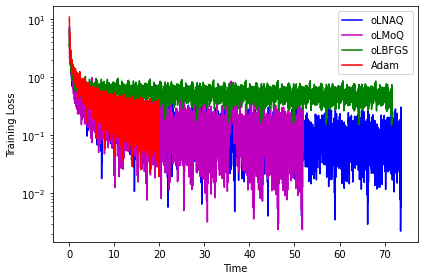

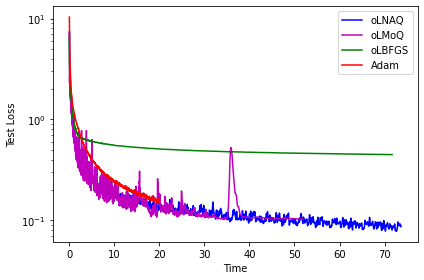

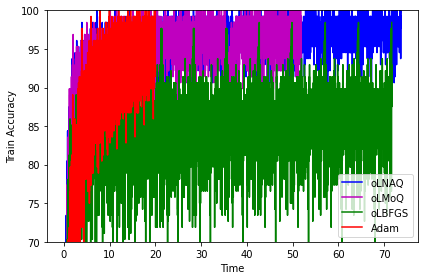

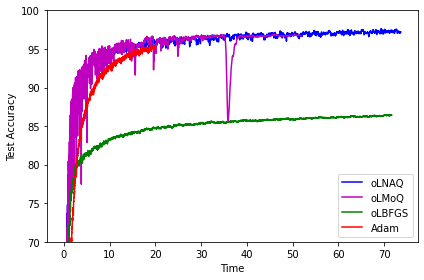

In [ ]:
config = tf.ConfigProto(allow_soft_placement=True, log_device_placement=False)
config.gpu_options.allow_growth = True

output = convolutional_neural_network(training_data)
# loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(output), reduction_indices=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=output))

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

perm_idx = []
for num in range(epoch):
    perm_idx.append(np.random.permutation(len(Ytrain)))


def get_batches(x_tr, y_tr, size, ep_num):
    # shuffle data
    # idx = np.random.permutation(len(y_tr))
    idx = perm_idx[ep_num - 1]
    x_tr, y_tr = x_tr[idx], y_tr[idx]

    num_batch = int(len(y_tr) / size)
    data = []
    lab = []
    for i in range(num_batch):
        data.append(x_tr[i * size:i * size + size])
        lab.append(y_tr[i * size:i * size + size])
    return data, lab


def update(l, a):
    global train_loss, train_acc
    train_loss = l
    train_acc = a


count = 0
for meth in algo:
    color = col[meth]
    if meth == 'Adam':
        train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

    else:
        m = 10
        # mu = 0.8
        sk_vec = collections.deque(maxlen=m)
        yk_vec = collections.deque(maxlen=m)
        alpha_k = collections.deque(maxlen=1)
        mu_val = collections.deque(maxlen=1)
        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

        alpha_k.append(1)
        vk_vec = collections.deque(maxlen=1)
        vk_vec.append(0)
        dirNorm = True

        if meth == 'oLNAQ' or meth == 'oLBFGS':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         'timeplot':timePlt,'err':errPlt,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})

        elif meth == 'oLMoQ':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,
            #grad_curr = collections.deque(maxlen=1)
            #grad_pre = collections.deque(maxlen=1)
            gfk_vec = collections.deque(maxlen=2)

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         #'grad_pre': grad_pre, 'grad_curr': grad_curr,
                         'timeplot':timePlt,'err':errPlt,'gfk_vec':gfk_vec,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})


    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    print("Initial Error of ", meth, " : ", sess.run(loss, feed_dict={training_data: Xtrain, labels: Ytrain}))

    step = 0
    alpha_k.append(1)
    eta0 = 128/130

    test_acc_plot = []
    test_loss_plot = []
    train_acc_plot = []
    train_loss_plot = []


    for ep in range(1, epoch + 1):
        print("EPOCH ", ep, " : ##########")
        theta_k = 1
        
        alpha_k.append(alpha_k[-1]*0.5)
        
        for i in range(iterations):
            step += 1

            data, lab = Xtr[i], Ytr[i]
            feed_dict = {training_data: data, labels: lab}

            if meth == 'Adam':
                start = time.time()
                _, train_loss, train_acc = sess.run([train_step, loss, accuracy], feed_dict=feed_dict)
                end = time.time()
                timePlt.append(end-start)



            else:
                mu = 0
                mu_val.append(0)

                #alpha_k.append(1 / np.sqrt(step))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))

                #alpha_k.append(0.1 * (epoch + 1 - ep))
              
                if meth != 'oLMoQ':
                  if step > 1:
                    alpha_k.append(1 / np.sqrt(step))
                
                

                if meth == 'oLBFGS': alpha_k.append(eta0 * (10/(10+step)))
                

                if meth == 'oLNAQ':
                    mu = 0.95
                    mu_val.append(0.95)

                if meth == 'oLMoQ':
                    # theta_kp1 = ((1e-5 - (theta_k * theta_k)) + np.sqrt(((1e-5 - (theta_k * theta_k)) * (1e-5 - (theta_k * theta_k))) + 4 * theta_k * theta_k)) / 2
                    # mu = np.minimum((theta_k * (1 - theta_k)) / (theta_k * theta_k + theta_kp1), 0.95)
                    # theta_k = theta_kp1
                    mu = 0.95
                    mu_val.append(0.95)
                    #alpha_k.append(0.1 * (epoch + 1 - ep))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))
                    


                res = train_step.minimize(sess, fetches=[loss, accuracy],
                                          loss_callback=update,
                                          feed_dict=feed_dict)


            test_loss, test_acc = sess.run([loss, accuracy], feed_dict={training_data: Xtest, labels: Ytest})
            test_acc_plot.append(test_acc * 100)
            test_loss_plot.append(test_loss)
            train_acc_plot.append(train_acc * 100)
            train_loss_plot.append(train_loss)


            if i % 50 == 0:
                print(
                    'Step {}; train loss {}; train accuracy {}; test loss {}; test accuracy {}; alpha {}; mu {}'.format(
                        i, train_loss, train_acc * 100, test_loss, test_acc * 100, alpha_k[0], mu))




    leg = algo

    plt.figure(1)
    plt.semilogy(np.cumsum(timePlt),train_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(2)
    plt.semilogy(np.cumsum(timePlt), test_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(3)
    plt.plot(np.cumsum(timePlt), train_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(4)
    plt.plot(np.cumsum(timePlt), test_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    timePlt.clear()
    sk_vec.clear()
    yk_vec.clear()
    vk_vec.clear()

    sess.close()

print('seed: ', seed)
plt.show()


Initial Error of  oLNAQ  :  10.926566
EPOCH  1  : ##########
Parameters:  26068
Step 0; train loss 7.120446681976318; train accuracy 11.71875; test loss 7.336763381958008; test accuracy 15.049999952316284; alpha 0.5; mu 0.95
Step 50; train loss 0.6154435873031616; train accuracy 84.375; test loss 0.7129750847816467; test accuracy 77.6199996471405; alpha 0.14002800840280097; mu 0.95
Step 100; train loss 0.4826830327510834; train accuracy 82.8125; test loss 0.4522153437137604; test accuracy 86.28000020980835; alpha 0.09950371902099892; mu 0.95
Step 150; train loss 0.3124096989631653; train accuracy 89.0625; test loss 0.33188316226005554; test accuracy 89.89999890327454; alpha 0.08137884587711594; mu 0.95
Step 200; train loss 0.33395203948020935; train accuracy 87.5; test loss 0.28478601574897766; test accuracy 91.20000004768372; alpha 0.07053456158585983; mu 0.95
Step 250; train loss 0.30923840403556824; train accuracy 90.625; test loss 0.2770446836948395; test accuracy 91.43999814987183

/tensorflow-1.15.2/python3.7/tensorflow_core/contrib/opt/python/training/external_optimizer.py:402: OptimizeWarning: Unknown solver options: muk
  result = scipy.optimize.minimize(*minimize_args, **minimize_kwargs)


Step 50; train loss 0.9255622625350952; train accuracy 71.875; test loss 1.0955543518066406; test accuracy 64.4599974155426; alpha 0.14002800840280097; mu 0
Step 100; train loss 0.8442595601081848; train accuracy 71.875; test loss 0.7973356246948242; test accuracy 74.76000189781189; alpha 0.09950371902099892; mu 0
Step 150; train loss 0.8646304607391357; train accuracy 73.4375; test loss 0.7413329482078552; test accuracy 77.20000147819519; alpha 0.08137884587711594; mu 0
Step 200; train loss 0.771761417388916; train accuracy 76.5625; test loss 0.7151435613632202; test accuracy 77.75999903678894; alpha 0.07053456158585983; mu 0
Step 250; train loss 0.7205027341842651; train accuracy 80.46875; test loss 0.6890633702278137; test accuracy 78.83999943733215; alpha 0.06311944030978031; mu 0
Step 300; train loss 0.4787101149559021; train accuracy 85.9375; test loss 0.6689599752426147; test accuracy 79.25999760627747; alpha 0.0576390417704235; mu 0
Step 350; train loss 0.7396299242973328; trai

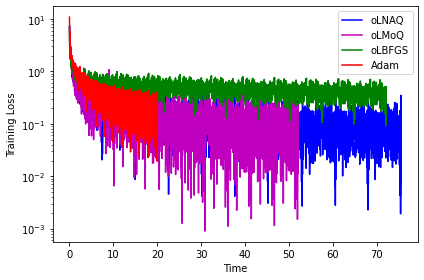

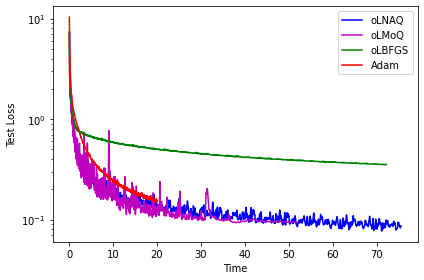

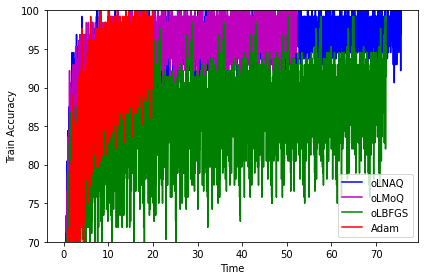

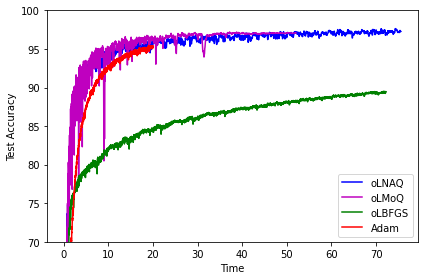

In [ ]:
config = tf.ConfigProto(allow_soft_placement=True, log_device_placement=False)
config.gpu_options.allow_growth = True

output = convolutional_neural_network(training_data)
# loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(output), reduction_indices=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=output))

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

perm_idx = []
for num in range(epoch):
    perm_idx.append(np.random.permutation(len(Ytrain)))


def get_batches(x_tr, y_tr, size, ep_num):
    # shuffle data
    # idx = np.random.permutation(len(y_tr))
    idx = perm_idx[ep_num - 1]
    x_tr, y_tr = x_tr[idx], y_tr[idx]

    num_batch = int(len(y_tr) / size)
    data = []
    lab = []
    for i in range(num_batch):
        data.append(x_tr[i * size:i * size + size])
        lab.append(y_tr[i * size:i * size + size])
    return data, lab


def update(l, a):
    global train_loss, train_acc
    train_loss = l
    train_acc = a


count = 0
for meth in algo:
    color = col[meth]
    if meth == 'Adam':
        train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

    else:
        m = 10
        # mu = 0.8
        sk_vec = collections.deque(maxlen=m)
        yk_vec = collections.deque(maxlen=m)
        alpha_k = collections.deque(maxlen=1)
        mu_val = collections.deque(maxlen=1)
        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

        alpha_k.append(1)
        vk_vec = collections.deque(maxlen=1)
        vk_vec.append(0)
        dirNorm = True

        if meth == 'oLNAQ' or meth == 'oLBFGS':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         'timeplot':timePlt,'err':errPlt,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})

        elif meth == 'oLMoQ':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,
            #grad_curr = collections.deque(maxlen=1)
            #grad_pre = collections.deque(maxlen=1)
            gfk_vec = collections.deque(maxlen=2)

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         #'grad_pre': grad_pre, 'grad_curr': grad_curr,
                         'timeplot':timePlt,'err':errPlt,'gfk_vec':gfk_vec,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})


    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    print("Initial Error of ", meth, " : ", sess.run(loss, feed_dict={training_data: Xtrain, labels: Ytrain}))

    step = 0
    alpha_k.append(1)
    eta0 = 128/130

    test_acc_plot = []
    test_loss_plot = []
    train_acc_plot = []
    train_loss_plot = []


    for ep in range(1, epoch + 1):
        print("EPOCH ", ep, " : ##########")
        theta_k = 1
        
        alpha_k.append(alpha_k[-1]*0.5)
        
        for i in range(iterations):
            step += 1

            data, lab = Xtr[i], Ytr[i]
            feed_dict = {training_data: data, labels: lab}

            if meth == 'Adam':
                start = time.time()
                _, train_loss, train_acc = sess.run([train_step, loss, accuracy], feed_dict=feed_dict)
                end = time.time()
                timePlt.append(end-start)



            else:
                mu = 0
                mu_val.append(0)

                #alpha_k.append(1 / np.sqrt(step))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))

                #alpha_k.append(0.1 * (epoch + 1 - ep))
              
                if meth != 'oLMoQ':
                  if step > 1:
                    alpha_k.append(1 / np.sqrt(step))
                
                

                #if meth == 'oLBFGS': alpha_k.append(eta0 * (10/(10+step)))
                

                if meth == 'oLNAQ':
                    mu = 0.95
                    mu_val.append(0.95)

                if meth == 'oLMoQ':
                    # theta_kp1 = ((1e-5 - (theta_k * theta_k)) + np.sqrt(((1e-5 - (theta_k * theta_k)) * (1e-5 - (theta_k * theta_k))) + 4 * theta_k * theta_k)) / 2
                    # mu = np.minimum((theta_k * (1 - theta_k)) / (theta_k * theta_k + theta_kp1), 0.95)
                    # theta_k = theta_kp1
                    mu = 0.95
                    mu_val.append(0.95)
                    #alpha_k.append(0.1 * (epoch + 1 - ep))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))
                    


                res = train_step.minimize(sess, fetches=[loss, accuracy],
                                          loss_callback=update,
                                          feed_dict=feed_dict)


            test_loss, test_acc = sess.run([loss, accuracy], feed_dict={training_data: Xtest, labels: Ytest})
            test_acc_plot.append(test_acc * 100)
            test_loss_plot.append(test_loss)
            train_acc_plot.append(train_acc * 100)
            train_loss_plot.append(train_loss)


            if i % 50 == 0:
                print(
                    'Step {}; train loss {}; train accuracy {}; test loss {}; test accuracy {}; alpha {}; mu {}'.format(
                        i, train_loss, train_acc * 100, test_loss, test_acc * 100, alpha_k[0], mu))




    leg = algo

    plt.figure(1)
    plt.semilogy(np.cumsum(timePlt),train_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(2)
    plt.semilogy(np.cumsum(timePlt), test_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(3)
    plt.plot(np.cumsum(timePlt), train_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(4)
    plt.plot(np.cumsum(timePlt), test_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    timePlt.clear()
    sk_vec.clear()
    yk_vec.clear()
    vk_vec.clear()

    sess.close()

print('seed: ', seed)
plt.show()


Initial Error of  oLNAQ  :  10.926566
EPOCH  1  : ##########
Parameters:  26068
Step 0; train loss 7.120446681976318; train accuracy 11.71875; test loss 7.336763381958008; test accuracy 15.049999952316284; alpha 0.5; mu 0.95
Step 50; train loss 0.7662185430526733; train accuracy 75.0; test loss 0.8673509955406189; test accuracy 70.56999802589417; alpha 0.5; mu 0.95
Step 100; train loss 0.35365694761276245; train accuracy 87.5; test loss 0.49616509675979614; test accuracy 83.74999761581421; alpha 0.5; mu 0.95
Step 150; train loss 0.3033655285835266; train accuracy 88.28125; test loss 0.3790876865386963; test accuracy 88.24999928474426; alpha 0.5; mu 0.95
Step 200; train loss 0.3069744110107422; train accuracy 91.40625; test loss 0.3184092342853546; test accuracy 90.6000018119812; alpha 0.5; mu 0.95
Step 250; train loss 0.38312089443206787; train accuracy 86.71875; test loss 0.3720652461051941; test accuracy 89.09000158309937; alpha 0.5; mu 0.95
Step 300; train loss 0.1066504567861557; t

/tensorflow-1.15.2/python3.7/tensorflow_core/contrib/opt/python/training/external_optimizer.py:402: OptimizeWarning: Unknown solver options: muk
  result = scipy.optimize.minimize(*minimize_args, **minimize_kwargs)


Step 50; train loss 1.388519048690796; train accuracy 54.6875; test loss 1.600953459739685; test accuracy 45.46000063419342; alpha 0.5; mu 0
Step 100; train loss 1.3056427240371704; train accuracy 51.5625; test loss 1.303995132446289; test accuracy 54.93000149726868; alpha 0.5; mu 0
Step 150; train loss 1.1607844829559326; train accuracy 62.5; test loss 1.0817559957504272; test accuracy 64.3999993801117; alpha 0.5; mu 0
Step 200; train loss 1.0092726945877075; train accuracy 64.0625; test loss 1.099652886390686; test accuracy 62.43000030517578; alpha 0.5; mu 0
Step 250; train loss 0.7511409521102905; train accuracy 81.25; test loss 0.7974404096603394; test accuracy 74.25000071525574; alpha 0.5; mu 0
Step 300; train loss 0.5399386882781982; train accuracy 81.25; test loss 0.6883887052536011; test accuracy 78.47999930381775; alpha 0.5; mu 0
Step 350; train loss 0.6583766937255859; train accuracy 79.6875; test loss 0.7026785016059875; test accuracy 76.75999999046326; alpha 0.5; mu 0
Step 

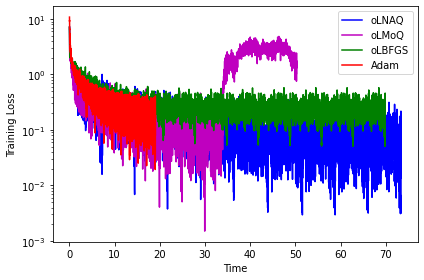

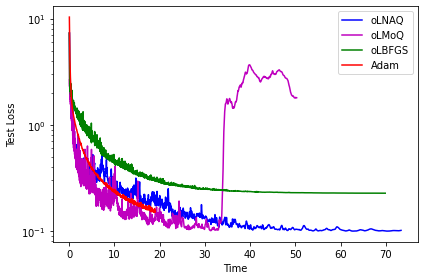

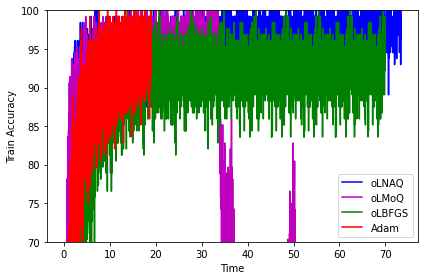

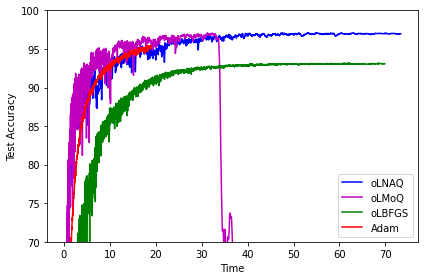

In [ ]:
config = tf.ConfigProto(allow_soft_placement=True, log_device_placement=False)
config.gpu_options.allow_growth = True

output = convolutional_neural_network(training_data)
# loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(output), reduction_indices=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=output))

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

perm_idx = []
for num in range(epoch):
    perm_idx.append(np.random.permutation(len(Ytrain)))


def get_batches(x_tr, y_tr, size, ep_num):
    # shuffle data
    # idx = np.random.permutation(len(y_tr))
    idx = perm_idx[ep_num - 1]
    x_tr, y_tr = x_tr[idx], y_tr[idx]

    num_batch = int(len(y_tr) / size)
    data = []
    lab = []
    for i in range(num_batch):
        data.append(x_tr[i * size:i * size + size])
        lab.append(y_tr[i * size:i * size + size])
    return data, lab


def update(l, a):
    global train_loss, train_acc
    train_loss = l
    train_acc = a


count = 0
for meth in algo:
    color = col[meth]
    if meth == 'Adam':
        train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

    else:
        m = 10
        # mu = 0.8
        sk_vec = collections.deque(maxlen=m)
        yk_vec = collections.deque(maxlen=m)
        alpha_k = collections.deque(maxlen=1)
        mu_val = collections.deque(maxlen=1)
        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

        alpha_k.append(1)
        vk_vec = collections.deque(maxlen=1)
        vk_vec.append(0)
        dirNorm = True

        if meth == 'oLNAQ' or meth == 'oLBFGS':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         'timeplot':timePlt,'err':errPlt,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})

        elif meth == 'oLMoQ':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,
            #grad_curr = collections.deque(maxlen=1)
            #grad_pre = collections.deque(maxlen=1)
            gfk_vec = collections.deque(maxlen=2)

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         #'grad_pre': grad_pre, 'grad_curr': grad_curr,
                         'timeplot':timePlt,'err':errPlt,'gfk_vec':gfk_vec,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})


    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    print("Initial Error of ", meth, " : ", sess.run(loss, feed_dict={training_data: Xtrain, labels: Ytrain}))

    step = 0
    alpha_k.append(1)
    eta0 = 128/130

    test_acc_plot = []
    test_loss_plot = []
    train_acc_plot = []
    train_loss_plot = []


    for ep in range(1, epoch + 1):
        print("EPOCH ", ep, " : ##########")
        theta_k = 1
        alpha_k.append(alpha_k[-1]*0.5)
        
        for i in range(iterations):
            step += 1

            data, lab = Xtr[i], Ytr[i]
            feed_dict = {training_data: data, labels: lab}

            if meth == 'Adam':
                start = time.time()
                _, train_loss, train_acc = sess.run([train_step, loss, accuracy], feed_dict=feed_dict)
                end = time.time()
                timePlt.append(end-start)



            else:
                mu = 0
                mu_val.append(0)

                #alpha_k.append(1 / np.sqrt(step))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))

                #alpha_k.append(0.1 * (epoch + 1 - ep))

                #if meth == 'oLBFGS': alpha_k.append(eta0 * (10/(10+step)))
                

                if meth == 'oLNAQ':
                    mu = 0.95
                    mu_val.append(0.95)

                if meth == 'oLMoQ':
                    # theta_kp1 = ((1e-5 - (theta_k * theta_k)) + np.sqrt(((1e-5 - (theta_k * theta_k)) * (1e-5 - (theta_k * theta_k))) + 4 * theta_k * theta_k)) / 2
                    # mu = np.minimum((theta_k * (1 - theta_k)) / (theta_k * theta_k + theta_kp1), 0.95)
                    # theta_k = theta_kp1
                    mu = 0.95
                    mu_val.append(0.95)
                    #alpha_k.append(0.1 * (epoch + 1 - ep))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))
                    


                res = train_step.minimize(sess, fetches=[loss, accuracy],
                                          loss_callback=update,
                                          feed_dict=feed_dict)


            test_loss, test_acc = sess.run([loss, accuracy], feed_dict={training_data: Xtest, labels: Ytest})
            test_acc_plot.append(test_acc * 100)
            test_loss_plot.append(test_loss)
            train_acc_plot.append(train_acc * 100)
            train_loss_plot.append(train_loss)


            if i % 50 == 0:
                print(
                    'Step {}; train loss {}; train accuracy {}; test loss {}; test accuracy {}; alpha {}; mu {}'.format(
                        i, train_loss, train_acc * 100, test_loss, test_acc * 100, alpha_k[0], mu))




    leg = algo

    plt.figure(1)
    plt.semilogy(np.cumsum(timePlt),train_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(2)
    plt.semilogy(np.cumsum(timePlt), test_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(3)
    plt.plot(np.cumsum(timePlt), train_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(4)
    plt.plot(np.cumsum(timePlt), test_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    timePlt.clear()
    sk_vec.clear()
    yk_vec.clear()
    vk_vec.clear()

    sess.close()

print('seed: ', seed)
plt.show()


Initial Error of  oLNAQ  :  10.926566
EPOCH  1  : ##########
Parameters:  26068
Step 0; train loss 7.120446681976318; train accuracy 11.71875; test loss 7.336763381958008; test accuracy 15.049999952316284; alpha 0.5; mu 0.95
Step 50; train loss 0.7271603345870972; train accuracy 75.0; test loss 0.8314073085784912; test accuracy 72.46000170707703; alpha 0.5; mu 0.95
Step 100; train loss 0.48667019605636597; train accuracy 78.90625; test loss 0.5212063193321228; test accuracy 83.28999876976013; alpha 0.5; mu 0.95
Step 150; train loss 0.3381088376045227; train accuracy 89.0625; test loss 0.4214685559272766; test accuracy 86.69000267982483; alpha 0.5; mu 0.95
Step 200; train loss 0.3866073489189148; train accuracy 86.71875; test loss 0.37070658802986145; test accuracy 89.31000232696533; alpha 0.5; mu 0.95
Step 250; train loss 0.4042147397994995; train accuracy 89.84375; test loss 0.34312117099761963; test accuracy 89.99999761581421; alpha 0.5; mu 0.95
Step 300; train loss 0.152948915958404

/tensorflow-1.15.2/python3.7/tensorflow_core/contrib/opt/python/training/external_optimizer.py:402: OptimizeWarning: Unknown solver options: muk
  result = scipy.optimize.minimize(*minimize_args, **minimize_kwargs)


Step 50; train loss 0.8772554397583008; train accuracy 69.53125; test loss 1.0320396423339844; test accuracy 66.46999716758728; alpha 0.1614123581336696; mu 0
Step 100; train loss 0.7974170446395874; train accuracy 74.21875; test loss 0.7410169839859009; test accuracy 76.56999826431274; alpha 0.0887040887040887; mu 0
Step 150; train loss 0.7361034154891968; train accuracy 75.78125; test loss 0.6602956652641296; test accuracy 79.73999977111816; alpha 0.06115623506927855; mu 0
Step 200; train loss 0.7982879281044006; train accuracy 71.875; test loss 0.6383261680603027; test accuracy 80.11000156402588; alpha 0.04666423623769595; mu 0
Step 250; train loss 0.5965338349342346; train accuracy 83.59375; test loss 0.6265366673469543; test accuracy 80.93000054359436; alpha 0.03772472737989979; mu 0
Step 300; train loss 0.4502915143966675; train accuracy 88.28125; test loss 0.6079459190368652; test accuracy 81.48999810218811; alpha 0.03165965866930497; mu 0
Step 350; train loss 0.733647346496582;

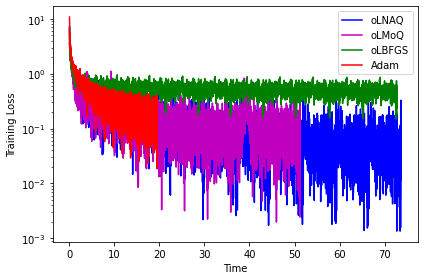

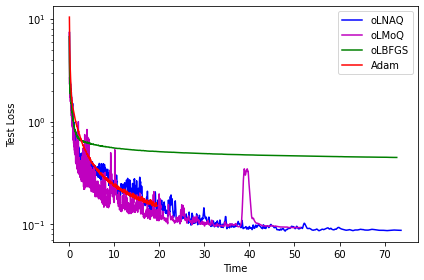

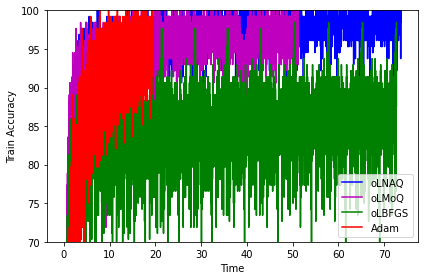

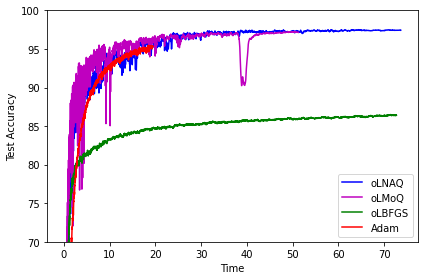

In [ ]:
config = tf.ConfigProto(allow_soft_placement=True, log_device_placement=False)
config.gpu_options.allow_growth = True

output = convolutional_neural_network(training_data)
# loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(output), reduction_indices=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=output))

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

perm_idx = []
for num in range(epoch):
    perm_idx.append(np.random.permutation(len(Ytrain)))


def get_batches(x_tr, y_tr, size, ep_num):
    # shuffle data
    # idx = np.random.permutation(len(y_tr))
    idx = perm_idx[ep_num - 1]
    x_tr, y_tr = x_tr[idx], y_tr[idx]

    num_batch = int(len(y_tr) / size)
    data = []
    lab = []
    for i in range(num_batch):
        data.append(x_tr[i * size:i * size + size])
        lab.append(y_tr[i * size:i * size + size])
    return data, lab


def update(l, a):
    global train_loss, train_acc
    train_loss = l
    train_acc = a


count = 0
for meth in algo:
    color = col[meth]
    if meth == 'Adam':
        train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

    else:
        m = 10
        # mu = 0.8
        sk_vec = collections.deque(maxlen=m)
        yk_vec = collections.deque(maxlen=m)
        alpha_k = collections.deque(maxlen=1)
        mu_val = collections.deque(maxlen=1)
        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

        alpha_k.append(1)
        vk_vec = collections.deque(maxlen=1)
        vk_vec.append(0)
        dirNorm = True

        if meth == 'oLNAQ' or meth == 'oLBFGS':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         'timeplot':timePlt,'err':errPlt,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})

        elif meth == 'oLMoQ':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,
            #grad_curr = collections.deque(maxlen=1)
            #grad_pre = collections.deque(maxlen=1)
            gfk_vec = collections.deque(maxlen=2)

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         #'grad_pre': grad_pre, 'grad_curr': grad_curr,
                         'timeplot':timePlt,'err':errPlt,'gfk_vec':gfk_vec,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})


    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    print("Initial Error of ", meth, " : ", sess.run(loss, feed_dict={training_data: Xtrain, labels: Ytrain}))

    step = 0
    alpha_k.append(1)
    eta0 = 128/130

    test_acc_plot = []
    test_loss_plot = []
    train_acc_plot = []
    train_loss_plot = []


    for ep in range(1, epoch + 1):
        print("EPOCH ", ep, " : ##########")
        theta_k = 1
        alpha_k.append(alpha_k[-1]*0.5)
        
        for i in range(iterations):
            step += 1

            data, lab = Xtr[i], Ytr[i]
            feed_dict = {training_data: data, labels: lab}

            if meth == 'Adam':
                start = time.time()
                _, train_loss, train_acc = sess.run([train_step, loss, accuracy], feed_dict=feed_dict)
                end = time.time()
                timePlt.append(end-start)



            else:
                mu = 0
                mu_val.append(0)

                #alpha_k.append(1 / np.sqrt(step))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))

                #alpha_k.append(0.1 * (epoch + 1 - ep))

                if meth == 'oLBFGS': alpha_k.append(eta0 * (10/(10+step)))
                

                if meth == 'oLNAQ':
                    mu = 0.95
                    mu_val.append(0.95)

                if meth == 'oLMoQ':
                    # theta_kp1 = ((1e-5 - (theta_k * theta_k)) + np.sqrt(((1e-5 - (theta_k * theta_k)) * (1e-5 - (theta_k * theta_k))) + 4 * theta_k * theta_k)) / 2
                    # mu = np.minimum((theta_k * (1 - theta_k)) / (theta_k * theta_k + theta_kp1), 0.95)
                    # theta_k = theta_kp1
                    mu = 0.95
                    mu_val.append(0.95)
                    #alpha_k.append(0.1 * (epoch + 1 - ep))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))
                    


                res = train_step.minimize(sess, fetches=[loss, accuracy],
                                          loss_callback=update,
                                          feed_dict=feed_dict)


            test_loss, test_acc = sess.run([loss, accuracy], feed_dict={training_data: Xtest, labels: Ytest})
            test_acc_plot.append(test_acc * 100)
            test_loss_plot.append(test_loss)
            train_acc_plot.append(train_acc * 100)
            train_loss_plot.append(train_loss)


            if i % 50 == 0:
                print(
                    'Step {}; train loss {}; train accuracy {}; test loss {}; test accuracy {}; alpha {}; mu {}'.format(
                        i, train_loss, train_acc * 100, test_loss, test_acc * 100, alpha_k[0], mu))




    leg = algo

    plt.figure(1)
    plt.semilogy(np.cumsum(timePlt),train_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(2)
    plt.semilogy(np.cumsum(timePlt), test_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(3)
    plt.plot(np.cumsum(timePlt), train_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(4)
    plt.plot(np.cumsum(timePlt), test_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    timePlt.clear()
    sk_vec.clear()
    yk_vec.clear()
    vk_vec.clear()

    sess.close()

print('seed: ', seed)
plt.show()


Initial Error of  oLNAQ  :  10.926566
EPOCH  1  : ##########
Parameters:  26068
Step 0; train loss 6.559026718139648; train accuracy 13.28125; test loss 6.690393924713135; test accuracy 14.249999821186066; alpha 0.8951048951048951; mu 0.95
Step 50; train loss 2.2726211547851562; train accuracy 13.28125; test loss 2.286273717880249; test accuracy 12.460000067949295; alpha 0.1614123581336696; mu 0.95
Step 100; train loss 2.1515517234802246; train accuracy 27.34375; test loss 2.15745210647583; test accuracy 27.559998631477356; alpha 0.0887040887040887; mu 0.95
Step 150; train loss 1.9742488861083984; train accuracy 31.25; test loss 1.9674427509307861; test accuracy 29.980000853538513; alpha 0.06115623506927855; mu 0.95
Step 200; train loss 1.8696367740631104; train accuracy 39.0625; test loss 1.8278398513793945; test accuracy 37.290000915527344; alpha 0.04666423623769595; mu 0.95
Step 250; train loss 1.7077460289001465; train accuracy 39.0625; test loss 1.7544007301330566; test accuracy 4

/tensorflow-1.15.2/python3.7/tensorflow_core/contrib/opt/python/training/external_optimizer.py:402: OptimizeWarning: Unknown solver options: muk
  result = scipy.optimize.minimize(*minimize_args, **minimize_kwargs)


Step 50; train loss 0.8772533535957336; train accuracy 69.53125; test loss 1.032037615776062; test accuracy 66.46999716758728; alpha 0.1614123581336696; mu 0
Step 100; train loss 0.7976996302604675; train accuracy 74.21875; test loss 0.7409672141075134; test accuracy 76.5999972820282; alpha 0.0887040887040887; mu 0
Step 150; train loss 0.7359146475791931; train accuracy 75.78125; test loss 0.6600478291511536; test accuracy 79.72000241279602; alpha 0.06115623506927855; mu 0
Step 200; train loss 0.7977403402328491; train accuracy 71.875; test loss 0.6377884745597839; test accuracy 80.15000224113464; alpha 0.04666423623769595; mu 0
Step 250; train loss 0.5961728692054749; train accuracy 83.59375; test loss 0.6260744333267212; test accuracy 80.90999722480774; alpha 0.03772472737989979; mu 0
Step 300; train loss 0.45007646083831787; train accuracy 88.28125; test loss 0.6073394417762756; test accuracy 81.51999711990356; alpha 0.03165965866930497; mu 0
Step 350; train loss 0.7328805923461914;

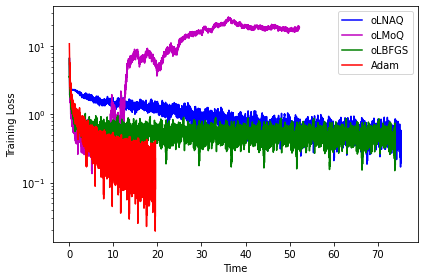

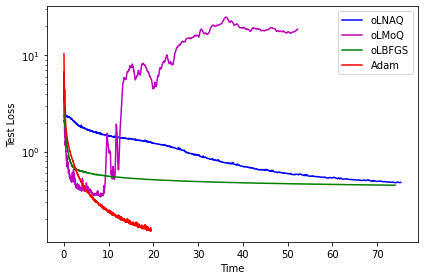

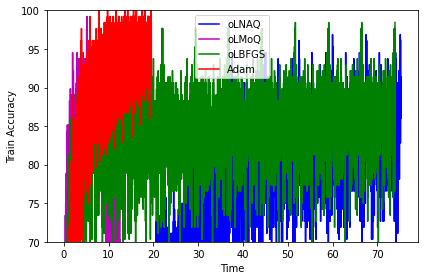

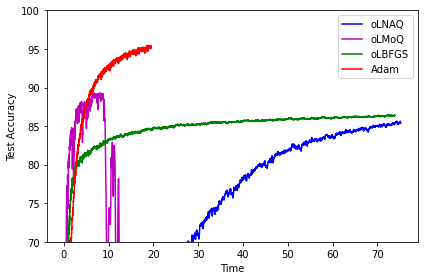

In [ ]:
config = tf.ConfigProto(allow_soft_placement=True, log_device_placement=False)
config.gpu_options.allow_growth = True

output = convolutional_neural_network(training_data)
# loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(output), reduction_indices=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=output))

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

perm_idx = []
for num in range(epoch):
    perm_idx.append(np.random.permutation(len(Ytrain)))


def get_batches(x_tr, y_tr, size, ep_num):
    # shuffle data
    # idx = np.random.permutation(len(y_tr))
    idx = perm_idx[ep_num - 1]
    x_tr, y_tr = x_tr[idx], y_tr[idx]

    num_batch = int(len(y_tr) / size)
    data = []
    lab = []
    for i in range(num_batch):
        data.append(x_tr[i * size:i * size + size])
        lab.append(y_tr[i * size:i * size + size])
    return data, lab


def update(l, a):
    global train_loss, train_acc
    train_loss = l
    train_acc = a


count = 0
for meth in algo:
    color = col[meth]
    if meth == 'Adam':
        train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

    else:
        m = 10
        # mu = 0.8
        sk_vec = collections.deque(maxlen=m)
        yk_vec = collections.deque(maxlen=m)
        alpha_k = collections.deque(maxlen=1)
        mu_val = collections.deque(maxlen=1)
        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

        alpha_k.append(1)
        vk_vec = collections.deque(maxlen=1)
        vk_vec.append(0)
        dirNorm = True

        if meth == 'oLNAQ' or meth == 'oLBFGS':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         'timeplot':timePlt,'err':errPlt,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})

        elif meth == 'oLMoQ':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,
            #grad_curr = collections.deque(maxlen=1)
            #grad_pre = collections.deque(maxlen=1)
            gfk_vec = collections.deque(maxlen=2)

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         #'grad_pre': grad_pre, 'grad_curr': grad_curr,
                         'timeplot':timePlt,'err':errPlt,'gfk_vec':gfk_vec,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})


    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    print("Initial Error of ", meth, " : ", sess.run(loss, feed_dict={training_data: Xtrain, labels: Ytrain}))

    step = 0
    alpha_k.append(1)
    eta0 = 128/130

    test_acc_plot = []
    test_loss_plot = []
    train_acc_plot = []
    train_loss_plot = []


    for ep in range(1, epoch + 1):
        print("EPOCH ", ep, " : ##########")
        theta_k = 1
        #alpha_k.append(alpha_k[-1]*0.5)
        
        for i in range(iterations):
            step += 1

            data, lab = Xtr[i], Ytr[i]
            feed_dict = {training_data: data, labels: lab}

            if meth == 'Adam':
                start = time.time()
                _, train_loss, train_acc = sess.run([train_step, loss, accuracy], feed_dict=feed_dict)
                end = time.time()
                timePlt.append(end-start)



            else:
                mu = 0
                mu_val.append(0)

                #alpha_k.append(1 / np.sqrt(step))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))

                #alpha_k.append(0.1 * (epoch + 1 - ep))

                alpha_k.append(eta0 * (10/(10+step)))
                

                if meth == 'oLNAQ':
                    mu = 0.95
                    mu_val.append(0.95)

                if meth == 'oLMoQ':
                    # theta_kp1 = ((1e-5 - (theta_k * theta_k)) + np.sqrt(((1e-5 - (theta_k * theta_k)) * (1e-5 - (theta_k * theta_k))) + 4 * theta_k * theta_k)) / 2
                    # mu = np.minimum((theta_k * (1 - theta_k)) / (theta_k * theta_k + theta_kp1), 0.95)
                    # theta_k = theta_kp1
                    mu = 0.95
                    mu_val.append(0.95)
                    #alpha_k.append(0.1 * (epoch + 1 - ep))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))


                res = train_step.minimize(sess, fetches=[loss, accuracy],
                                          loss_callback=update,
                                          feed_dict=feed_dict)


            test_loss, test_acc = sess.run([loss, accuracy], feed_dict={training_data: Xtest, labels: Ytest})
            test_acc_plot.append(test_acc * 100)
            test_loss_plot.append(test_loss)
            train_acc_plot.append(train_acc * 100)
            train_loss_plot.append(train_loss)


            if i % 50 == 0:
                print(
                    'Step {}; train loss {}; train accuracy {}; test loss {}; test accuracy {}; alpha {}; mu {}'.format(
                        i, train_loss, train_acc * 100, test_loss, test_acc * 100, alpha_k[0], mu))




    leg = algo

    plt.figure(1)
    plt.semilogy(np.cumsum(timePlt),train_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(2)
    plt.semilogy(np.cumsum(timePlt), test_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(3)
    plt.plot(np.cumsum(timePlt), train_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(4)
    plt.plot(np.cumsum(timePlt), test_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    timePlt.clear()
    sk_vec.clear()
    yk_vec.clear()
    vk_vec.clear()

    sess.close()

print('seed: ', seed)
plt.show()


Initial Error of  oLBFGS  :  10.926566
EPOCH  1  : ##########


/tensorflow-1.15.2/python3.7/tensorflow_core/contrib/opt/python/training/external_optimizer.py:402: OptimizeWarning: Unknown solver options: muk
  result = scipy.optimize.minimize(*minimize_args, **minimize_kwargs)


Step 0; train loss 7.120446681976318; train accuracy 11.71875; test loss 7.336763381958008; test accuracy 15.049999952316284; alpha 0.5; mu 0
Step 50; train loss 1.3884994983673096; train accuracy 54.6875; test loss 1.6008343696594238; test accuracy 45.46999931335449; alpha 0.5; mu 0
Step 100; train loss 1.301729679107666; train accuracy 52.34375; test loss 1.3046120405197144; test accuracy 54.85000014305115; alpha 0.5; mu 0
Step 150; train loss 1.1594654321670532; train accuracy 62.5; test loss 1.0797529220581055; test accuracy 64.410001039505; alpha 0.5; mu 0
Step 200; train loss 1.0074868202209473; train accuracy 64.0625; test loss 1.0946356058120728; test accuracy 62.459999322891235; alpha 0.5; mu 0
Step 250; train loss 0.7541075944900513; train accuracy 80.46875; test loss 0.7997525334358215; test accuracy 74.00000095367432; alpha 0.5; mu 0
Step 300; train loss 0.5409625768661499; train accuracy 81.25; test loss 0.6887136101722717; test accuracy 78.60000133514404; alpha 0.5; mu 0


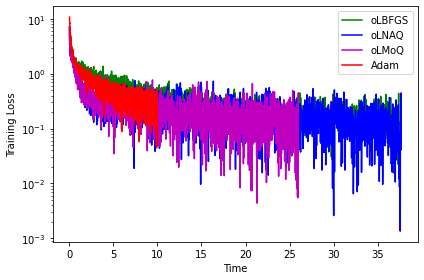

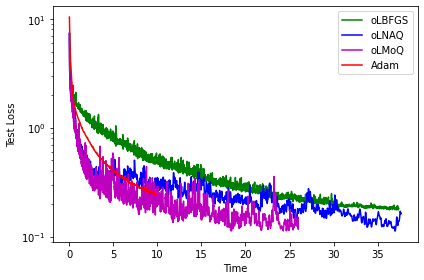

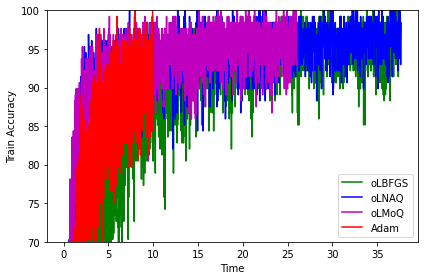

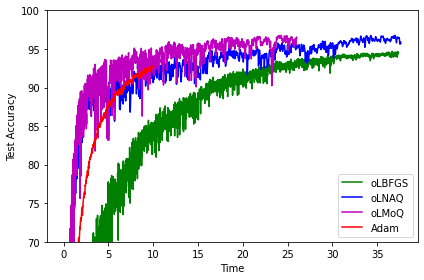

In [ ]:
config = tf.ConfigProto(allow_soft_placement=True, log_device_placement=False)
config.gpu_options.allow_growth = True

output = convolutional_neural_network(training_data)
# loss = tf.reduce_mean(-tf.reduce_sum(labels*tf.log(output), reduction_indices=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=output))

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

perm_idx = []
for num in range(epoch):
    perm_idx.append(np.random.permutation(len(Ytrain)))


def get_batches(x_tr, y_tr, size, ep_num):
    # shuffle data
    # idx = np.random.permutation(len(y_tr))
    idx = perm_idx[ep_num - 1]
    x_tr, y_tr = x_tr[idx], y_tr[idx]

    num_batch = int(len(y_tr) / size)
    data = []
    lab = []
    for i in range(num_batch):
        data.append(x_tr[i * size:i * size + size])
        lab.append(y_tr[i * size:i * size + size])
    return data, lab


def update(l, a):
    global train_loss, train_acc
    train_loss = l
    train_acc = a


count = 0
for meth in algo:
    color = col[meth]
    if meth == 'Adam':
        train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

    else:
        m = 10
        # mu = 0.8
        sk_vec = collections.deque(maxlen=m)
        yk_vec = collections.deque(maxlen=m)
        alpha_k = collections.deque(maxlen=1)
        mu_val = collections.deque(maxlen=1)
        timePlt = collections.deque(maxlen=iterations * epoch)
        errPlt = collections.deque(maxlen=iterations * epoch)

        alpha_k.append(1)
        vk_vec = collections.deque(maxlen=1)
        vk_vec.append(0)
        dirNorm = True

        if meth == 'oLNAQ' or meth == 'oLBFGS':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         'timeplot':timePlt,'err':errPlt,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})

        elif meth == 'oLMoQ':  # vk_vec=None, sk_vec=None, yk_vec=None, m=8, alpha_k=1.0, mu=None, dirNorm=True,
            #grad_curr = collections.deque(maxlen=1)
            #grad_pre = collections.deque(maxlen=1)
            gfk_vec = collections.deque(maxlen=2)

            train_step = tf.contrib.opt.ScipyOptimizerInterface(
                loss, method=meth.lower(),
                options={'maxiter': iterations, 'disp': False, 'vk_vec': vk_vec, 'sk_vec': sk_vec, 'yk_vec': yk_vec,
                         #'grad_pre': grad_pre, 'grad_curr': grad_curr,
                         'timeplot':timePlt,'err':errPlt,'gfk_vec':gfk_vec,
                         'm': m, 'alpha_k': alpha_k, 'muk': mu_val, 'dirNorm': dirNorm})


    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    print("Initial Error of ", meth, " : ", sess.run(loss, feed_dict={training_data: Xtrain, labels: Ytrain}))

    step = 0

    test_acc_plot = []
    test_loss_plot = []
    train_acc_plot = []
    train_loss_plot = []


    for ep in range(1, epoch + 1):
        print("EPOCH ", ep, " : ##########")
        theta_k = 1
        
        for i in range(iterations):
            step += 1

            data, lab = Xtr[i], Ytr[i]
            feed_dict = {training_data: data, labels: lab}

            if meth == 'Adam':
                start = time.time()
                _, train_loss, train_acc = sess.run([train_step, loss, accuracy], feed_dict=feed_dict)
                end = time.time()
                timePlt.append(end-start)



            else:
                mu = 0
                mu_val.append(0)

                #alpha_k.append(1 / np.sqrt(step))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))

                alpha_k.append(0.1 * (epoch + 1 - ep))


                if meth == 'oLNAQ':
                    mu = 0.95
                    mu_val.append(0.95)

                if meth == 'oLMoQ':
                    # theta_kp1 = ((1e-5 - (theta_k * theta_k)) + np.sqrt(((1e-5 - (theta_k * theta_k)) * (1e-5 - (theta_k * theta_k))) + 4 * theta_k * theta_k)) / 2
                    # mu = np.minimum((theta_k * (1 - theta_k)) / (theta_k * theta_k + theta_kp1), 0.95)
                    # theta_k = theta_kp1
                    mu = 0.95
                    mu_val.append(0.95)
                    #alpha_k.append(0.1 * (epoch + 1 - ep))  # (0.01*(epoch+1-ep))#((np.sqrt(step)/(ep+step)))#*(batch_size+2)))#1 / (np.sqrt(step)))


                res = train_step.minimize(sess, fetches=[loss, accuracy],
                                          loss_callback=update,
                                          feed_dict=feed_dict)


            test_loss, test_acc = sess.run([loss, accuracy], feed_dict={training_data: Xtest, labels: Ytest})
            test_acc_plot.append(test_acc * 100)
            test_loss_plot.append(test_loss)
            train_acc_plot.append(train_acc * 100)
            train_loss_plot.append(train_loss)


            if i % 50 == 0:
                print(
                    'Step {}; train loss {}; train accuracy {}; test loss {}; test accuracy {}; alpha {}; mu {}'.format(
                        i, train_loss, train_acc * 100, test_loss, test_acc * 100, alpha_k[0], mu))




    leg = algo

    plt.figure(1)
    plt.semilogy(np.cumsum(timePlt),train_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Training Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(2)
    plt.semilogy(np.cumsum(timePlt), test_loss_plot, color)
    plt.xlabel('Time')
    plt.ylabel('Test Loss')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(3)
    plt.plot(np.cumsum(timePlt), train_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Train Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    plt.figure(4)
    plt.plot(np.cumsum(timePlt), test_acc_plot, color)
    plt.ylim((70,100))
    plt.xlabel('Time')
    plt.ylabel('Test Accuracy')
    plt.legend(leg)
    plt.tight_layout()

    timePlt.clear()
    sk_vec.clear()
    yk_vec.clear()
    vk_vec.clear()

    sess.close()

print('seed: ', seed)
plt.show()
